From the descriptive analysis, we have identified that some predictors are correlated. The predictors are on a ratio scale. The dependent variable is discrete with values stretching from 3 to 8. It is better to recode the response variable into few categories. It can be done as a binary classification as well as a multi class classification. Therefore, a tree-based approach will be the best option to tackle this problem and to create a classification model with high accuracy.

I have used logistic regression, linear discriminant analysis, decision tree classifier, random forest classifier, bagging classifier, gradient boosting classifier, XGBoost classifier, ADABoost classifier, extra tree classifier, voting classifier and stacking classifier with SMOTE resampling. Here the highest accuracy of 85.4% was achieved by stacking classifier without resampling.

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("D:\\Kaggle Project\\Wine Quality Prediction\\red wine.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Recoding the response variable to two categories as high quality and low quality.

In [7]:
new=[]
for row in df['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [8]:
df['newquality']=new

In [9]:
from collections import Counter
print(sorted(Counter(df['newquality']).items()))

[(1, 744), (2, 855)]


here we can see that dataet is not balanced. to overcome this problem we can use oversampling or undersampling. since low class have small number of observations here I am using oversampling techinque.

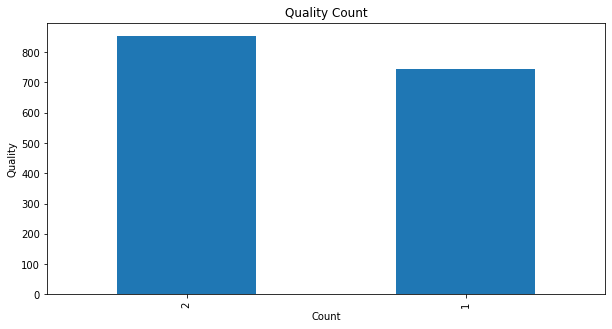

In [10]:
#Histogram
df.newquality.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Quality Count")
plt.ylabel('Quality')
plt.xlabel('Count')
plt.show()

(13.5, -0.5)

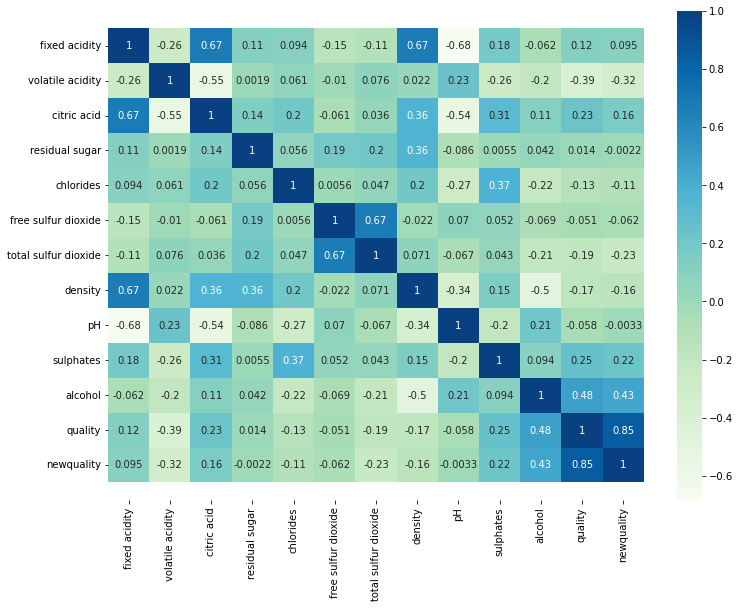

In [11]:
plt.figure(figsize=(12,9))               #correlation matrix
ax = sns.heatmap(df.corr(),annot = True,cmap='GnBu')
bottom, top = ax.get_ylim()              #fixing seaborn plotting issues
ax.set_ylim(bottom + 0.5, top - 0.5)

from the correaltion plot we can see there are some highly correlated variables. in this analysis we are looking for prediction accuracy hence those correlations are neglected and also from the background study of red wines you can see that all the variables in this dataset are really important for final quality prediction.

In [12]:
X=df.drop(['quality','newquality'],axis=1)
y=df['newquality']

In [13]:
#Train-Test split
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(X,y,test_size=0.20,random_state=1234)

resampling using synthetic minority oversampling technique

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

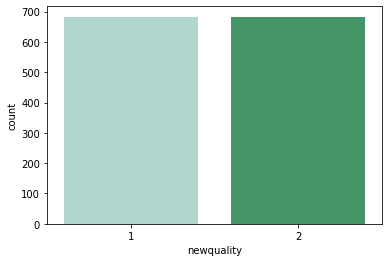

In [15]:
sns.countplot(y_train,palette='BuGn')

In [16]:
print(sorted(Counter(y_train).items()))

[(1, 683), (2, 683)]


## Model train/test evaluation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Models with resampling

train accuracy: 0.7401171303074671 
 test accuracy: 0.765625


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.80      0.72      0.76       165
           2       0.73      0.81      0.77       155

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



confusion matrix for logistic regression


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


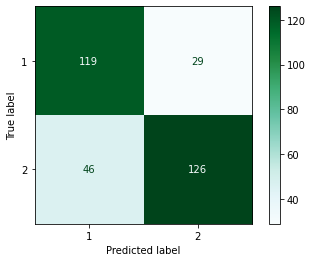

In [19]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.7415812591508053 
 test accuracy: 0.771875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.82      0.72      0.77       167
           2       0.73      0.82      0.78       153

    accuracy                           0.77       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



confusion matrix for linear discriminant analysis


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


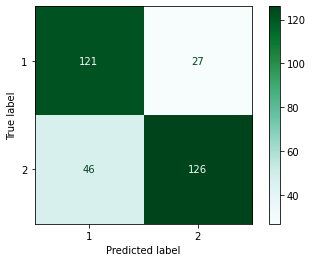

In [20]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.778125


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.80      0.74      0.77       159
           2       0.76      0.81      0.79       161

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for decision tree classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


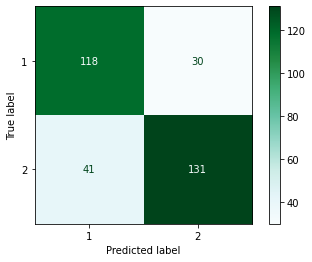

In [21]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.846875


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       147
           2       0.86      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for random forest classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


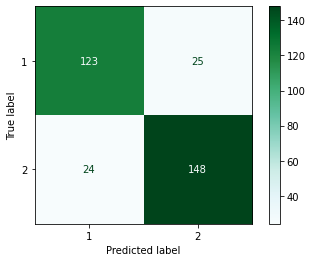

In [22]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.9846266471449487 
 test accuracy: 0.796875


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.86      0.74      0.80       173
           2       0.74      0.86      0.80       147

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.81      0.80      0.80       320



confusion matrix for bagging classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


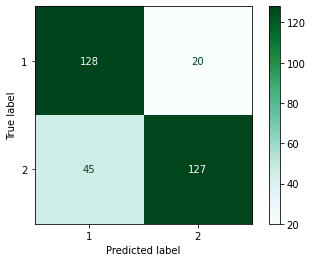

In [23]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.8733528550512445 
 test accuracy: 0.8125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.84      0.78      0.81       160
           2       0.79      0.85      0.82       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



confusion matrix for gradient boosting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


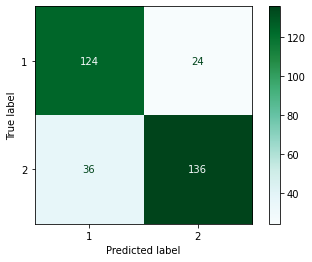

In [24]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.7957540263543191 
 test accuracy: 0.759375


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.78      0.72      0.75       159
           2       0.74      0.80      0.77       161

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


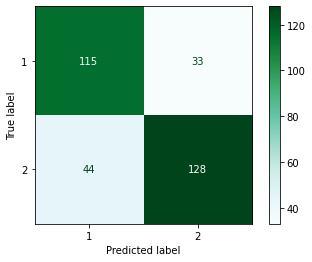

In [25]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.83125


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.83      0.81      0.82       152
           2       0.83      0.85      0.84       168

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



confusion matrix for extra tree classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


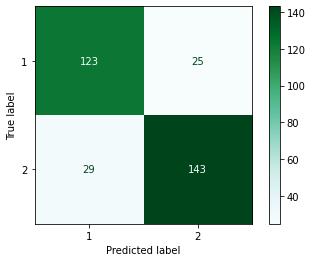

In [26]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.BuGn, values_format='d')

train accuracy: 1.0 
 test accuracy: 0.834375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.84      0.81      0.82       153
           2       0.83      0.86      0.84       167

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



confusion matrix for voting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


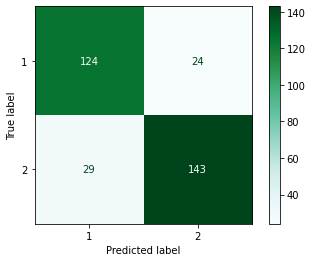

In [27]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.BuGn, values_format='d')

train accuracy: 1.0 
 test accuracy: 0.840625


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       153
           2       0.84      0.86      0.85       167

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for voting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


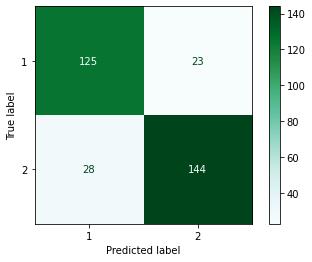

In [28]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=42)))]
sc= StackingClassifier( estimators=estimators)

model11=sc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

Stacking classifier gives the highest accuracy which is 84%. Precision and recall values are also high for this model. Hence with SMOTE resampling the best model is stacking classifier with random forest classifier and extra tree classifier.

### Models without resampling

train accuracy: 0.7427677873338546 
 test accuracy: 0.78125


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       156
           2       0.77      0.81      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for logistic regression


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


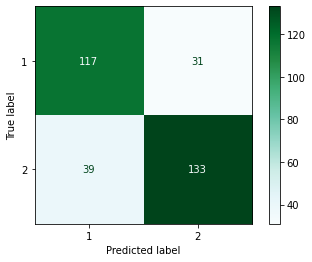

In [30]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.7396403440187647 
 test accuracy: 0.7875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       156
           2       0.78      0.82      0.80       164

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for linear discriminant analysis


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


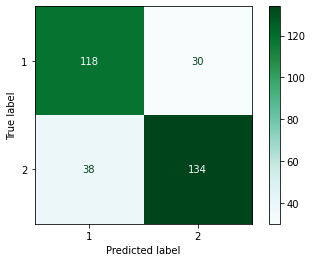

In [31]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.74375


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.73      0.72      0.72       150
           2       0.76      0.76      0.76       170

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



confusion matrix for decision tree classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


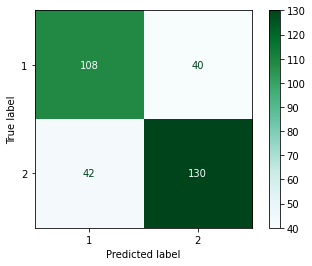

In [32]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.840625


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.83      0.83      0.83       149
           2       0.85      0.85      0.85       171

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for random forest classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


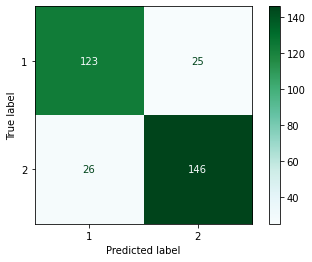

In [34]:
#random forest classifier
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.9882720875684128 
 test accuracy: 0.796875


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       149
           2       0.81      0.81      0.81       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for bagging classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


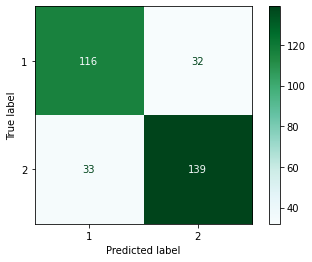

In [35]:
#Bagging classifier
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.874120406567631 
 test accuracy: 0.803125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       153
           2       0.80      0.83      0.81       167

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


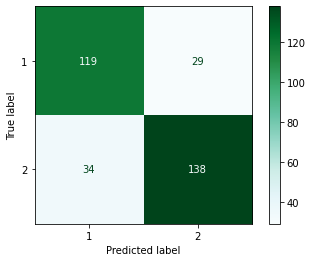

In [36]:
#Gradient boosting classifier
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 0.7998436278342455 
 test accuracy: 0.7625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.74      0.75      0.74       146
           2       0.78      0.78      0.78       174

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


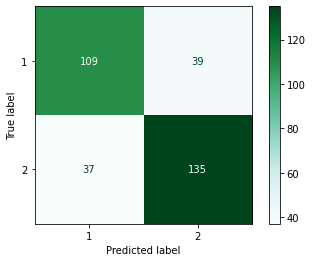

In [37]:
#Ada boosting classifier
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       144
           2       0.87      0.85      0.86       176

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for extra tree classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


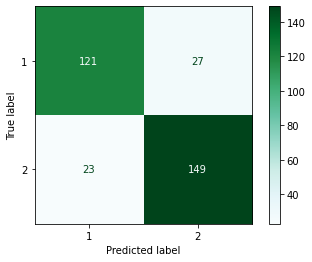

In [38]:
#Extra tree classifier
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.85      0.85      0.85       149
           2       0.87      0.87      0.87       171

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


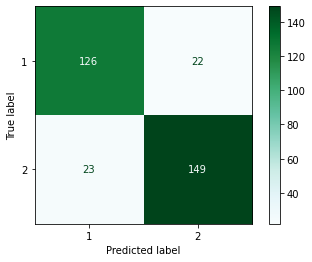

In [39]:
#Voting classifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       143
           2       0.88      0.86      0.87       177

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


C:\Users\mridu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


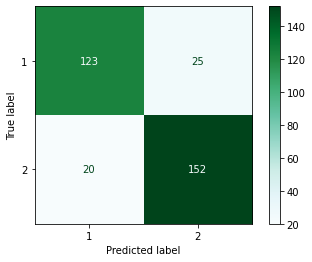

In [41]:
#Stacking Classifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=12)))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.BuGn , values_format='d')

From the above models stacking classifier, voting classifier and random forest classifier have higher perfromance than other models. Stacking classifier and Voting Classifier are the ones with highest accuracy 85.94% with the best precision and recall as well. We can see that without resampling there is a slight increase in accuracy. Hence the model without SMOTE resampling is the best one. The accuracy can be increased by tuning hyper parameters of these models using scikit learn randomized grid search.